In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
## the fuction is set to use the worse case situation, 
##if you want to use best case, put survival_case=1 or reproduction_case=1 for best case
def bobcat_P(N,P_1,survival_case=None,reproduction_case=None):
    W_S=np.zeros((16,16))
    W_S_list=[0.32]+[0.68]*15
    np.fill_diagonal(W_S, W_S_list)   #Worst case survival rate matrix
    
    B_S=np.zeros((16,16))
    B_S_list=[0.34]+[0.71]*15
    np.fill_diagonal(B_S, B_S_list)   #Best case survival rate matrix
    
    W_R=np.zeros((16,16))
    W_R_list=[0.6]*2+[1.15]*14
    np.fill_diagonal(W_R, W_R_list)   #Worst case reproduction rate matrix
    
    B_R=np.zeros((16,16))
    B_R_list=[0.63]*2+[1.2]*14
    np.fill_diagonal(B_R, B_R_list)   #Worst case reproduction rate matrix
    
    sum_population=np.zeros(N)
    reproduced_list=np.zeros(N-1)
    reproduction_percentage=np.zeros(N-1)
    survived_list=np.zeros(N-1)
    survived_percentage=np.zeros(N-1)
    P_matrix=P_1
    
    
    if survival_case==1:   ##set cases
        S=B_S
    else:
        S=W_S
    if reproduction_case==1:
        R=B_R
    else:
        R=W_R
        
        
    for t in np.arange(N):
        if t==0:
            sum_population[t]=np.sum(P_1)
        else:
            if t ==1:
                survivaled_P=np.dot(S,P_1)
                
            else:
                survivaled_P=np.dot(S,new_population)
               
            reproducted_P=np.dot(R,survivaled_P)
            new_survivaled_P=survivaled_P
            reproduced_list[t-1]=np.sum(reproducted_P)
            
            for i in np.arange(len(survivaled_P))[::-1]:
                if i!=0:
                    new_survivaled_P[i]=survivaled_P[i-1]
                else:
                    new_survivaled_P[i]=0  
            survived_list[t-1]=np.sum(new_survivaled_P)
            new_survivaled_P[0]=np.sum(reproducted_P)
            new_population=new_survivaled_P
            sum_population[t]=np.sum(new_population)
            P_matrix=np.hstack((P_matrix,new_population))
    print('total population in each year:',sum_population)
    print('population distribution by age in each year:',
          P_matrix)
    df = pd.DataFrame({
        'Year': np.arange(1,N+1),
        'Population': sum_population})
    plot=sns.lineplot(data=df,x='Year',y='Population')
    
    print('reproduction in each year:',reproduced_list)
    for n in np.arange(N-1):
        reproduction_percentage[n]=reproduced_list[n]/sum_population[n]
    print('percentage reproduction rate:',reproduction_percentage)
    
    print('survival in each year:',survived_list)
    for n in np.arange(N-1):
        survived_percentage[n]=survived_list[n]/sum_population[n]
    print('percentage survival rate:',survived_percentage)
    
    print('average reproduction rate:',np.mean(reproduction_percentage))
    print('average survival rate:',np.mean(survived_percentage))
    print('average death rate:,',1-np.mean(survived_percentage))
    return plot
##P_1 is the initial 16 by 1 matrix represents the number of bobcats in each age group from 1 to 16, the sum of P_1 is the
## total bobcats population in that year

total population in each year: [160.         213.88       197.16576    178.26342272 168.3050856
 159.71611042 151.67756552 144.53028514 138.05634484 132.06795896
 126.47596222 121.2167225  116.24113168 111.51384087 107.00886358
 102.70635418  98.6018266   94.56637278  90.65586867  86.92472793
  83.35729633  79.93590885  76.65541569  73.51068205  70.49553067
  67.60432345  64.83187053  62.17321221  59.62361372  57.17856177
  54.83374429  52.58503584  50.428487    48.36030638  46.37695131
  44.47496819  42.65099508  40.90182409  39.22439048  37.61575213
  36.07308641  34.59368732  33.17496013  31.81441652  30.50967025
  29.258433    28.05851035  26.90779784  25.80427735  24.74601354
  23.73115041  22.75790804  21.82457948  20.92952783  20.0711833
  19.24804049  18.45865573  17.70164457  16.97567932  16.27948676
  15.61184588  14.97158573  14.35758341  13.76876204  13.20408893
  12.66257372  12.14326669  11.64525706  11.16767138  10.70967205
  10.27045581   9.84925235   9.44532294   9.057

<AxesSubplot:xlabel='Year', ylabel='Population'>

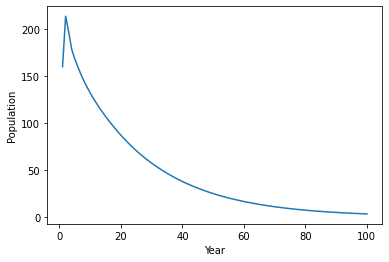

In [43]:
P_1=np.array([[10]*16])   # here I used a 16 by 1 matrix with 10 in each entry as the initial condition, which means we have 10 bobcats
                        ## in each age group and in total we have 160 bobcats initially.
P_1=P_1.transpose()

bobcat_P(100,P_1)


total population in each year: [ 160.          228.695       223.927629    214.81384192  215.3556587
  216.99075069  218.74759989  221.23081847  224.25823896  227.6344257
  231.28598764  235.16149589  239.21860599  243.42825141  247.77078364
  252.23259646  256.82617595  261.29239841  265.73910188  270.30562401
  274.97783523  279.72938986  284.56411923  289.48583682  294.49446453
  299.59061441  304.77555718  310.05058449  315.41703735  320.87635132
  326.43002879  332.0796227   337.82673167  343.67295868  349.62037778
  355.6708785   361.82612671  368.08788865  374.4580261   380.93841596
  387.53095889  394.23759355  401.06029393  408.00106793  415.06195845
  422.2450441   429.55243965  436.9862966   444.54880379  452.24218803
  460.0687148   468.03068816  476.13045185  484.37039048  492.75292994
  501.2805381   509.95572548  518.78104611  527.7590982   536.89252492
  546.18401521  555.6363045   565.25217562  575.0344595   584.9860361
  595.10983522  605.40883733  615.88607452  626.5

<AxesSubplot:xlabel='Year', ylabel='Population'>

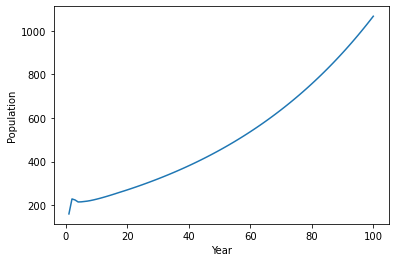

In [44]:
bobcat_P(100,P_1,survival_case=1,reproduction_case=1)
